The Canonical Ensemble
======================

Most physical systems are not isolated, but exchange energy with the
environment. Since the system is very small compared to the environment,
we consider that the environment acts effectively as a heat reservoir or
heat bath at a fixed temperature $T$. If a small system is put in
thermal contact with the heat bath, it will reach thermal equilibrium
exchanging energy until the system attains the temperature of the bath.

Imagine an infinitely large number of mental copies of the system and
the heat bath. The probability $P_s$ that the system is found in a
microstate $s$ with energy $s$ is given by:
$$P_s=\frac{1}{Z}e^{-E_s/k_BT},
$$ where $Z$ is the normalization constant. This
corresponds to the canonical ensemble. Since $\sum P_s = 1$, we have
$$Z=\sum_s{e^{-E_s/k_BT}},
$$ where the sum is over all the possible microstates of the
system. This equation defines the “partition function” of the system.

We can use (\[c\_boltz\]) to obtain the ensemble average of physical
quantities of interest. For instance, the mean energy is given by:
$$\langle E \rangle = \sum_s E_s\, P_s=\frac{1}{Z}\sum_s{E_s\,e^{-\beta
E_s}},$$ with $\beta=1/k_BT$.

The Metropolis algorithm
------------------------

We want to obtain an estimate for the mean value of an observable $A$:
$$\langle A \rangle = \sum_s A_s e^{-\beta E_s}/\sum_s e^{-\beta E_s},$$
where $E_s$ and $A_s$ are the values of the energy and the quantity $A$
in the configuration $s$. The idea of using Monte Carlo consists in
sampling a subset of configuration and approximating the average by the
mean over the sample:
$$\langle A \rangle \simeq \sum_s^{m} A_s e^{-\beta E_s}/\sum_s^{m}
e^{-\beta E_s},$$ where the sampling is over $m$ configurations.

A crude Monte Carlo procedure is to generate a configuration at random,
calculate $E_s$ and $A_s$, and the contributions of this configuration
to the sums. This is equivalent to the “hit and miss” Monte Carlo method
for evaluating integrals. We have seen that this approach is very
inefficient, because the configurations generated would likely be very
improbable and contribute very little to the sum. Instead, we want to
generate a sample of configurations that are <span>*important*</span>,
<span>*i. e.*</span> have large contributions to the sums. This is
precisely the equivalent to “importance sampling”. Hence, we need to
generate the configurations according to a probability distribution. In
this case, the most convenient one is not other than the Boltzmann
probability itself $P_s$ (\[c\_boltz\]). Since we will average over the
$m$ configurations generated with this probability, we must use the
expression:
$$\langle A \rangle \simeq \sum_s^{m} \frac{A_s}{P_s} e^{-\beta
E_s}/\sum_s^{m} \frac{1}{P_s}e^{-\beta E_s}
= \frac{1}{m}\sum_s^{m}A_s$$

The idea of the Monte Carlo algorithm consists in performing a random
walk over the space of configurations. The walker “hops” from a
configuration $i$ to another $j$ using the “transition probability”
$$W=\min{\left(1,\frac{P_j}{P_i}\right)}.$$ Replacing by the
corresponding expression, we obtain:
$$W=\min{\left(1,e^{-\beta(E_j-E_i)}\right)}.$$

Since we are only interested in the ratio $P_j/P_j$, it is not necessary
to know the normalization constant $Z$. Although we have picked this
expression for the transition probability $W$, is not the only choice.
It can be shown that the only requirement is that $W$ satisfies the
“detailed balance” condition:
$$W(i \rightarrow j)e^{-\beta E_i} = W(j \rightarrow i)e^{-\beta E_j}.$$

Another comon choice in the literature is given by:
$$W(i\rightarrow j)=\frac{1}{e^{-\beta (E_j-E_i)}+1}.$$ Note that if
$\Delta E=0$, then $W=1/2$ and the trial configuration has an equal
probability of being accepted.

The pseudocode for a Monte Carlo simulation can be outlined as follows:

1.  Establish an initial configuration.

2.  Make a random trial change in the configuration. For example, choose
    a spin at random and try to flip it. Or choose a particle at random
    and attempt to displace it a random distance.

3.  Compute the change in the energy of the system $\Delta E$ due to the
    trial change.

4.  If $\Delta E \leq 0$, accept the new configuration and go to step 8.

5.  If $\Delta E$ is positive, compute the “transition probability”
    $W=e^{-\beta \Delta E}$.

6.  Generate a random number $r$ in the interval $[0,1]$.

7.  If $r \leq W$, accept the new configuration; otherwise retain the
    previous configuration.

8.  Repeat steps (2) to (8) to obtain a sufficient number of
    configurations or “trials”.

9.  Compute averages over configurations which are statistically
    independent of each other.
    
### Important conditions for validity

A Monte Carlo algorithm must satisfy detailed balance, but also **Ergodicity**. This means that the possible moves should guarantee that the system will explore the entire phase space. If there are regions of phase space that are not accessible via local moves, for instance, one should implement global moves or more complex update strategies.

### Exercise 1: Classical gas in 1D 

In this case, we assume that the particles do not interact and 
the particle velocities are continuous and unbounded. The
energy is the sum of the kinetic energies of the individual
particles. Hence, for and ideal gas, the only coordinates of interest are
the velocities. In order to change a configuration, we choose a particle
at random and change its velocity by a random amount according to the corresponding
transition probability. For simplicity we
consider only the one-dimensional case.

1.  Simulate an ideal gas of $N$ particles in 1D. Choose $N=20$, $T=100$
    and 200 MC steps. Give all the particles the same initial velocity
    $v_0=10$. Determine the value of the maximum velocity change
    $\Delta v$ so that the acceptance ratio is approximately $50\%$.
    What is the mean kinetic energy and mean velocity of the particles?

2.  We might expect that the total energy of an ideal gas to remain
    constant since the particles do not interact with each other and
    hence they cannot exchange energy directly. What is the initial
    value of the energy of the system? Does it remain constant? If it
    does not, explain how the energy changes. Explain why the measured
    mean particle velocity is zero even though the initial particle
    velocities are not zero.

3.  What is a simple criterion for “thermal equilibrium”? Estimate the
    number of Monte Carlo steps per particle necessary for the system to
    reach thermal equilibrium. What choice of the initial velocities
    allows the system to reach thermal equilibrium at temperature $T$ as
    quickly as possible?

4.  Compute the mean energy per particle for $T=10$, $100$ and $400$. In
    order to compute the averages after the system has reached thermal
    equilibrium, start measuring only after equilibrium has
    been achieved. Increase the number of Monte Carlo steps until the
    desired averages do not change appreciably. What is the approximate
    number of warmup steps for $N=10$ and $T=100$, and for $N=40$ and
    $T=100$? If the number of warmup steps is different in the two
    cases, explain the reason for this difference.

5.  Compute the probability $P(E)dE$ for the system of $N$ particles to
    have a total energy between $E$ and $E+dE$. Do you expect $P(E)$ to
    be proportional to $e^{-\beta E}$? Plot $P(E)$ as a function of $E$
    and describe the qualitative behavior of $P(E)$. Does the plot of
    $\ln{(P(E))}$ yield a straight line?
    
6.  Compute the mean energy for $T=10$, $20$, $30$,... $90$, $100$ and
    $110$ and estimate the heat capacity.

7.  Compute the mean square energy fluctuations $\langle \Delta E^2
    \rangle = \langle E^2 \rangle - \langle E \rangle ^2$ for $T=10$ and
    $T=40$. Compare the magnitude of the ratio $\langle \Delta E^2
    \rangle/T^2$ with the heat capacity determined in the previous item.



Acceptance ratio=  0.813
<Energy>= 39.76871485637808
<Energy^2>= 4739.335328808985
Error= 0.039735278075540614
Acceptance ratio=  0.8444045


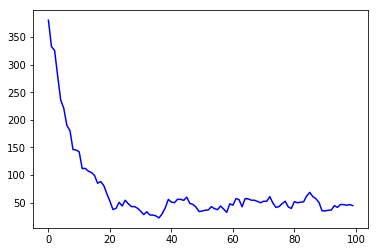

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

nwalkers = 20
v = np.zeros(nwalkers) #velocity of the 20 particles
v.fill(20) #initial velocity
T = 80 ############### Modify to calculate average for T= 10, 100, 400 and calculate energy
delta = 5

def metropolis(vold):
    global delta, T
    vtrial = np.random.random() #random velocity
    vtrial = vold+(2*vtrial-1)*delta #random particle velocity change
    weight = np.exp(-(vtrial**2-vold**2)/T) #transition probability
    vnew = vold
    if(weight >= 1): #Accept
        vnew = vtrial
    elif(weight != 0):
        r = np.random.random()
        if(r <= weight): #Accept
            vnew = vtrial
    return vnew

# Warmup loop

Nwarmup = 100 #number warmup steps
Ewarmup = np.zeros(Nwarmup)

Naccept = 0.
for j in range(Nwarmup): #for all the warm up steps
    for i in range(nwalkers): #for each particle
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    Ewarmup[j] = np.sum(v**2)/nwalkers #total energy from each particle calculated from v from Metropolis

x = np.arange(0,Nwarmup,1) # number of steps
pyplot.plot(x,Ewarmup,ls='-',c='blue'); #vs energy at each step


print("Acceptance ratio= ", Naccept/float(Nwarmup*nwalkers))

# Measurement loop

Nmeasure = 100000
Naccept = 0.
E = 0.
E2 = 0.
for j in range(Nmeasure):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1

    E += np.sum(v**2)
    E2 += np.sum(v**4)

E = E/Nmeasure/nwalkers
E2 = E2/Nmeasure/nwalkers
print("<Energy>=", E)
print("<Energy^2>=", E2)
print("Error=", np.sqrt((E2-E**2)/Nmeasure/nwalkers))

print("Acceptance ratio= ", Naccept/float(Nmeasure*nwalkers))
        
    

#### Challenge 3

Exercise 1, items 4-7

4.

In [4]:
nwalkers = 20
v = np.zeros(nwalkers) #velocity of the 20 particles
v.fill(20) #initial velocity
Tarray = [10,100,400] ############### Modify to calculate average for T= 10, 100, 400 and calculate energy
delta = 5

for i in range(0,len(Tarray)):
    T = Tarray[i]
    print("##########For Temperature T =",T,"############")
    
    # Warmup loop

    Nwarmup = 100 #number warmup steps
    Ewarmup = np.zeros(Nwarmup)

    Naccept = 0.
    for j in range(Nwarmup): #for all the warm up steps
        for i in range(nwalkers): #for each particle
            vold = v[i]
            v[i] = metropolis(v[i])
            if(v[i] != vold):
                Naccept += 1

        Ewarmup[j] = np.sum(v**2)/nwalkers #total energy from each particle calculated from v from Metropolis

    print("Acceptance ratio= ", Naccept/float(Nwarmup*nwalkers))

    # Measurement loop

    Nmeasure = 100000
    Naccept = 0.
    E = 0.
    E2 = 0.
    for j in range(Nmeasure):
        for i in range(nwalkers):
            vold = v[i]
            v[i] = metropolis(v[i])
            if(v[i] != vold):
                Naccept += 1

        E += np.sum(v**2)
        E2 += np.sum(v**4)

    E = E/Nmeasure/nwalkers
    E2 = E2/Nmeasure/nwalkers
    print("<Energy>=", E)
    print("<Energy^2>=", E2)
    print("Error=", np.sqrt((E2-E**2)/Nmeasure/nwalkers))

    print("Acceptance ratio= ", Naccept/float(Nmeasure*nwalkers),"\n")



##########For Temperature T = 10 ############
Acceptance ratio=  0.5975
<Energy>= 5.0005024941783836
<Energy^2>= 74.87408800293635
Error= 0.004993448848674236
Acceptance ratio=  0.5948455 

##########For Temperature T = 100 ############
Acceptance ratio=  0.846
<Energy>= 50.065962180097316
<Energy^2>= 7510.683750525726
Error= 0.05002041174114219
Acceptance ratio=  0.860343 

##########For Temperature T = 400 ############
Acceptance ratio=  0.9405
<Energy>= 203.0661053472127
<Energy^2>= 123632.69450547271
Error= 0.2029739532114742
Acceptance ratio=  0.9294025 



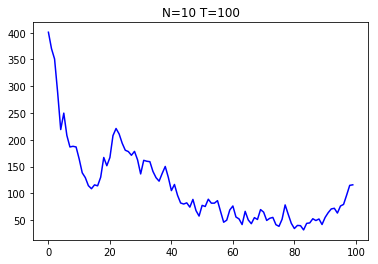

In [5]:
############ N=10 T=100 
nwalkers = 10
v = np.zeros(nwalkers)
v.fill(20)
T = 100
delta = 5

# Warmup loop

Nwarmup = 100
Ewarmup = np.zeros(Nwarmup)

Naccept = 0.
for j in range(Nwarmup):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    Ewarmup[j] = np.sum(v**2)/nwalkers

x = np.arange(0,Nwarmup,1)
pyplot.plot(x,Ewarmup,ls='-',c='blue');  
pyplot.title("N=10 T=100")
pyplot.show()
    

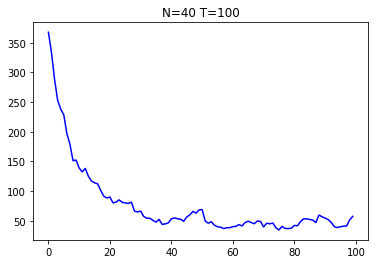

In [6]:
############ N=40 T=100 
nwalkers = 40
v = np.zeros(nwalkers)
v.fill(20)
T = 100
delta = 5

# Warmup loop

Nwarmup = 100
Ewarmup = np.zeros(Nwarmup)

Naccept = 0.
for j in range(Nwarmup):
    for i in range(nwalkers):
        vold = v[i]
        v[i] = metropolis(v[i])
        if(v[i] != vold):
            Naccept += 1
        
    Ewarmup[j] = np.sum(v**2)/nwalkers

x = np.arange(0,Nwarmup,1)
pyplot.plot(x,Ewarmup,ls='-',c='blue');
pyplot.title("N=40 T=100")
pyplot.show()
    

In [7]:
print ("The second case requires more warm up steps to reach equlilibrium prior to the measurement")

The second case requires more warm up steps to reach equlilibrium prior to the measurement


5.

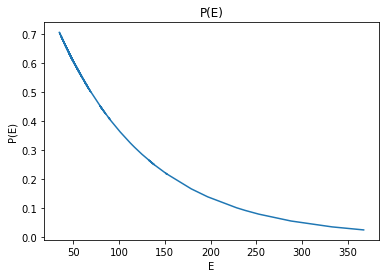

In [8]:
P= np.exp(-Ewarmup/100) #Probability P(E) from Boltzman
pyplot.plot(Ewarmup,P)
pyplot.title("P(E)")
pyplot.xlabel("E")
pyplot.ylabel("P(E)")
pyplot.show()

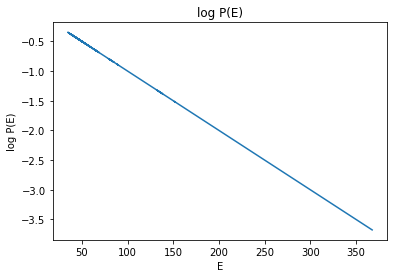

In [9]:
pyplot.plot(Ewarmup, np.log(P))
pyplot.title("log P(E)")
pyplot.xlabel("E")
pyplot.ylabel("log P(E)")
pyplot.show()

6.

##########For Temperature T = 10.0 ############
Acceptance ratio=  0.584
T 10.0
<Energy>= 4.998173676909372
<Energy^2>= 75.05791629201481
Error= 0.005003807359774408
Acceptance ratio=  0.595029 

##########For Temperature T = 20.0 ############
Acceptance ratio=  0.7025
<Energy>= 10.006095304329566
<Energy^2>= 301.02982232653443
Error= 0.010022671277838265
Acceptance ratio=  0.700138 

##########For Temperature T = 30.0 ############
Acceptance ratio=  0.7605
<Energy>= 14.952356339501046
<Energy^2>= 670.487520435278
Error= 0.014948487554462842
Acceptance ratio=  0.7509915 

##########For Temperature T = 40.0 ############
Acceptance ratio=  0.784
T 40.0
<Energy>= 19.978297974659867
<Energy^2>= 1201.2881365257613
Error= 0.02002692870314196
Acceptance ratio=  0.782604 

##########For Temperature T = 50.0 ############
Acceptance ratio=  0.8085
<Energy>= 24.978708269491925
<Energy^2>= 1867.377390550559
Error= 0.024934328983734204
Acceptance ratio=  0.80484 

##########For Temperature T = 60.0

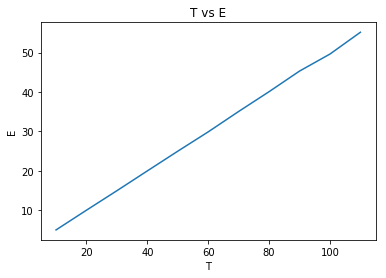

In [49]:
nwalkers = 20
v = np.zeros(nwalkers) #velocity of the 20 particles
v.fill(20) #initial velocity
Tarray = np.linspace(10,110,11) ######## Temperature every 10 from 10 to 110
delta = 5
Earray = np.zeros(11)
delEarray = []

for k in range(0,len(Tarray)):
    T = Tarray[k]
    print("##########For Temperature T =",T,"############")
    
    # Warmup loop

    Nwarmup = 100 #number warmup steps
    Ewarmup = np.zeros(Nwarmup)

    Naccept = 0.
    for j in range(Nwarmup): #for all the warm up steps
        for i in range(nwalkers): #for each particle
            vold = v[i]
            v[i] = metropolis(v[i])
            if(v[i] != vold):
                Naccept += 1

        Ewarmup[j] = np.sum(v**2)/nwalkers #total energy from each particle calculated from v from Metropolis

    print("Acceptance ratio= ", Naccept/float(Nwarmup*nwalkers))

    # Measurement loop

    Nmeasure = 100000
    Naccept = 0.
    E = 0.
    E2 = 0.
    for j in range(Nmeasure):
        for i in range(nwalkers):
            vold = v[i]
            v[i] = metropolis(v[i])
            if(v[i] != vold):
                Naccept += 1

        E += np.sum(v**2)
        E2 += np.sum(v**4)

    E = E/Nmeasure/nwalkers  
    Earray[k] = E
    E2 = E2/Nmeasure/nwalkers
    
    if T == 10.0 or T==40.0:
        print("T",T)
        delE = E2 - E**2
        delEarray.append(delE)
    
    print("<Energy>=", E)
    print("<Energy^2>=", E2)
    print("Error=", np.sqrt((E2-E**2)/Nmeasure/nwalkers))

    print("Acceptance ratio= ", Naccept/float(Nmeasure*nwalkers),"\n")
    
pyplot.plot(Tarray,Earray);
pyplot.title("T vs E");
pyplot.xlabel("T");
pyplot.ylabel("E");
pyplot.show()

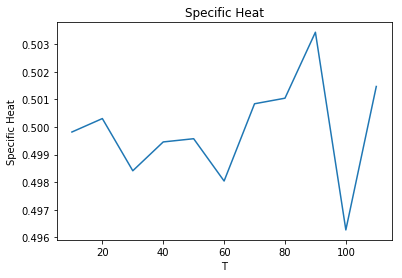

In [60]:
pyplot.plot(Tarray, Earray/Tarray)
#pyplot.ylim(bottom=0.25,top=0.75) 
pyplot.title("Specific Heat")
pyplot.xlabel("T")
pyplot.ylabel("Specific Heat")
pyplot.show()

7.

In [42]:
print("Mean square T=10:",delEarray[0])
print("Mean square T=40:",delEarray[1])
print("Ratio Mean Square and T^2 T=10:",delEarray[0]/(10**2))
print("Ratio Mean Square and T^2 T=40:",delEarray[1]/(40**2))

Mean square T=10: 50.111036712950444
Mean square T=40: 803.501430054795
Ratio Mean Square and T^2 T=10: 0.5011103671295044
Ratio Mean Square and T^2 T=40: 0.5021883937842468


In [43]:
print("The ratio of the mean square and the temperature squared agree with the estimate of the heat capacity, 0.5")

The ratio of the mean square and the temperature squared agree with the estimate of the heat capacity, 0.5
